In [1]:
import xarray as xr
from pathlib import Path

In [2]:
path = Path('/Volumes/LaCie/inversions/ppe/0lev/thickness')
datasets = []
for file in path.glob('*.nc'):
    ds = xr.open_dataset(file)
    thk = ds.thickness
    dthk = thk.isel(time=-1) - thk.isel(time=0)
    datasets.append(dthk)

thickness_change = xr.concat(datasets, dim='run')
thickness_change.assign_coords(run=range(len(datasets)))
mean_dthk = thickness_change.mean(dim='run')
std_dthk = thickness_change.std(dim='run')

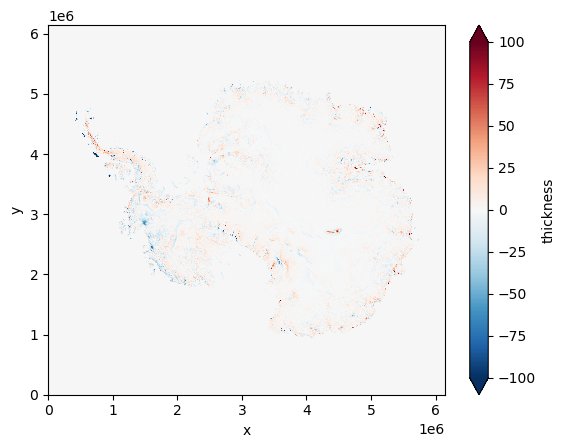

In [9]:
mean_dthk.plot(vmax=100, vmin=-100, cmap='RdBu_r')

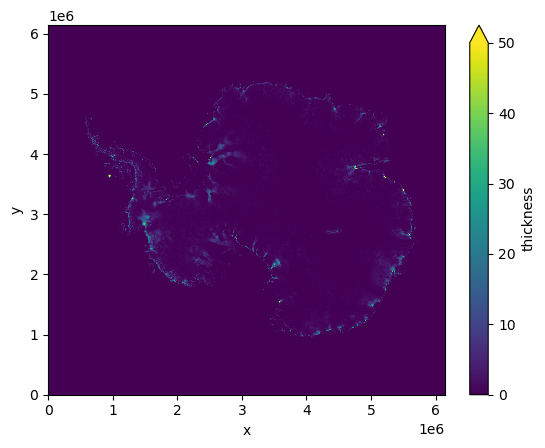

In [7]:
std_dthk.plot(vmax=50)